## Human Resources Analytics

Well, while I was searching in [kaggle](https://www.kaggle.com) for my new project, I found this interesting dataset! The title was attractive and in a further exploration, it was and the content too. All we got is a data frame​ with 10 attributes. Nine(9) of them are indicative for why employees leaving prematurely their companies. 
Let's see in deeper analysis our problem...

Fields in the dataset include:

- Last evaluation

- Number of projects

- Average monthly hours

- Time spent at the company

- Whether they have had a work accident

- Whether they have had a promotion in the last 5 years

- Department

- Salary

- Whether the employee has left

We have to predict if the employee will either stay or leave the company. So this is a **classification** (supervised learning) problem. To be more clear it's a discrete value estimation (Binary values like 0/1, yes/no, True/False).

- 0 = Stayed

- 1 = Left

Once again let's get our hands dirty and explore our dataset.

In [1]:
import pandas as pd
import numpy as np

# load data
df=pd.read_csv('HR_comma_sep.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


The 7th column "left" is our target label. The last two columns have object values. We will manipulate them later.



### How many employees left and how many stayed?

In [2]:
print(df.left.value_counts())
print()
print('Stats:')
x=round(df.left.value_counts()/len(df)*100,2)
print(x[1],'% of employees left')
print(x[0],'% of employees stayed')


0    11428
1     3571
Name: left, dtype: int64

Stats:
23.81 % of employees left
76.19 % of employees stayed


#### Looking for missing values (NA's)

In [3]:
# NA's
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Good news, we don't have any missing values. We earn time to explore our charts. So let's get it started!

### Visualizations tell us a story

First, we will see if there is any correlation between the numeric attributes. Just to explore a path into the "data forest". 

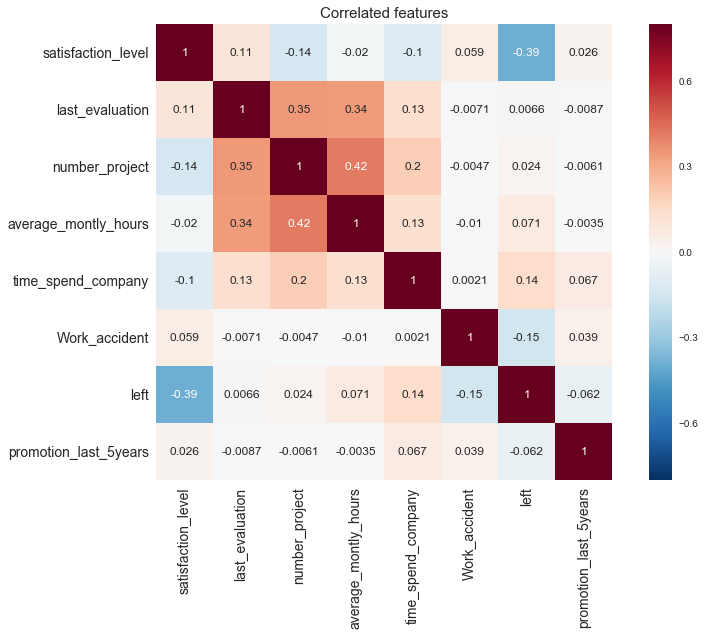

In [4]:
# correlation matrix
corr=df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr,annot=True,vmax=0.8,square=True)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(rotation=0,fontsize=14)
plt.title('Correlated features',fontsize=15)
plt.tight_layout()
plt.show()

First thoughts... we don't see many correlated values. We must have in mind that, this is not a regression problem. But if we look at the map more carefully we will see that, there are three values with a notable correlation between them. These values correspond to:
- a. Last evaluation 
- b. Number of projects 
- c. Average monthly hours

Keep that in mind, we will be back at them soon...

#### What's the story ...?

We will start to explore data through charts to extract some useful information. Let's start with salary. Is this a criterion for someone to leave his/her job?

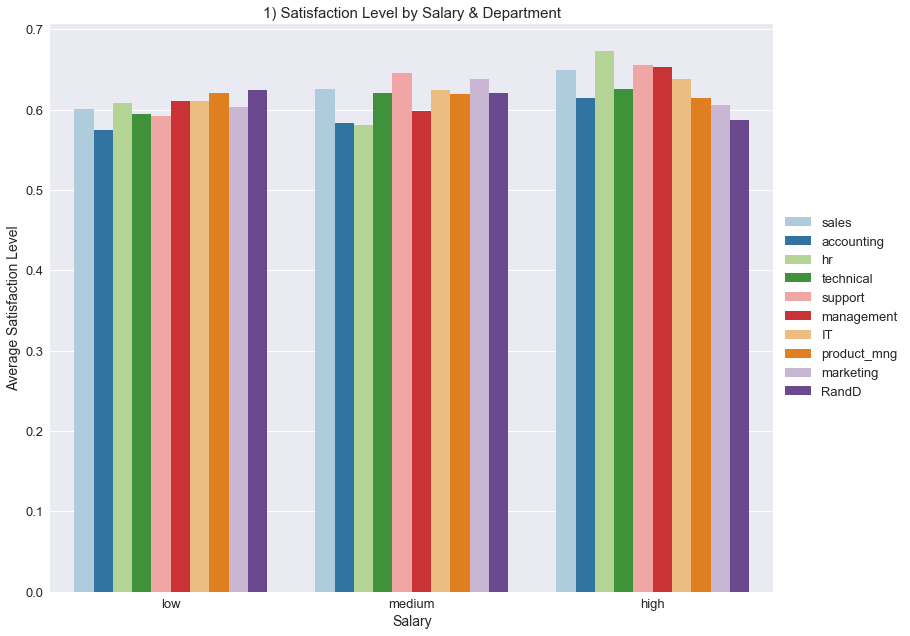

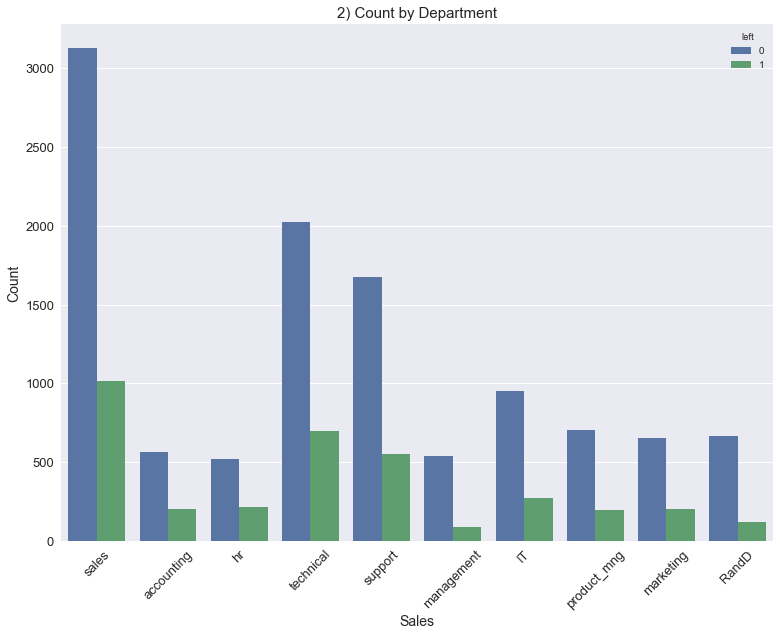

In [5]:
fig,ax = plt.subplots(figsize=(11, 9))
sns.barplot(x='salary', y='satisfaction_level', hue='sales', data=df, palette='Paired',ci=None)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size':13})
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Average Satisfaction Level',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('1) Satisfaction Level by Salary & Department',fontsize=15)
plt.tight_layout()
plt.show()

fig,ax = plt.subplots(figsize=(11, 9))
sns.countplot(x='sales', hue='left', data = df)
plt.xlabel('Sales',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13,rotation=45)
plt.yticks(fontsize=13)
plt.title('2) Count by Department',fontsize=15)
plt.tight_layout()
plt.show()


I think that employees in Accounting department are the tail in low and medium salary scale. HR department has the most satisfied employees in the high scale. Also, product management employees have​ a stable satisfaction level in all scales. We can say more about this chart, but let's keep our appetite for the rest. 

However, we see that Sales department (Chart 2) have the biggest number of employees who left their job. Check Accounting department staff leaks, are fewer than Sales dept. Although, the average satisfaction level is bigger in Sales dept than Accounting in the salary scale. What is going on here? Salary is not the main reason, for employees, to leave their company!

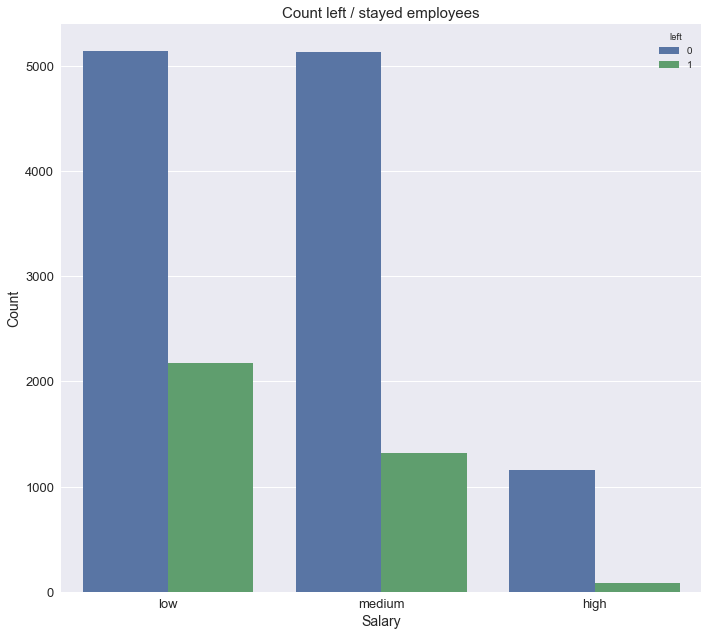

In [6]:
# Count left/stayed employees

fig,ax = plt.subplots(figsize=(10, 9))
sns.countplot(x='salary', hue='left', data = df)
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Count left / stayed employees',fontsize=15)
plt.tight_layout()
plt.show()

Salary by itself it's not indicative of our problem. I think that we must discover the causes of "employee leakage". Besides we have 6 more attributes to examine. Let's go deeper...

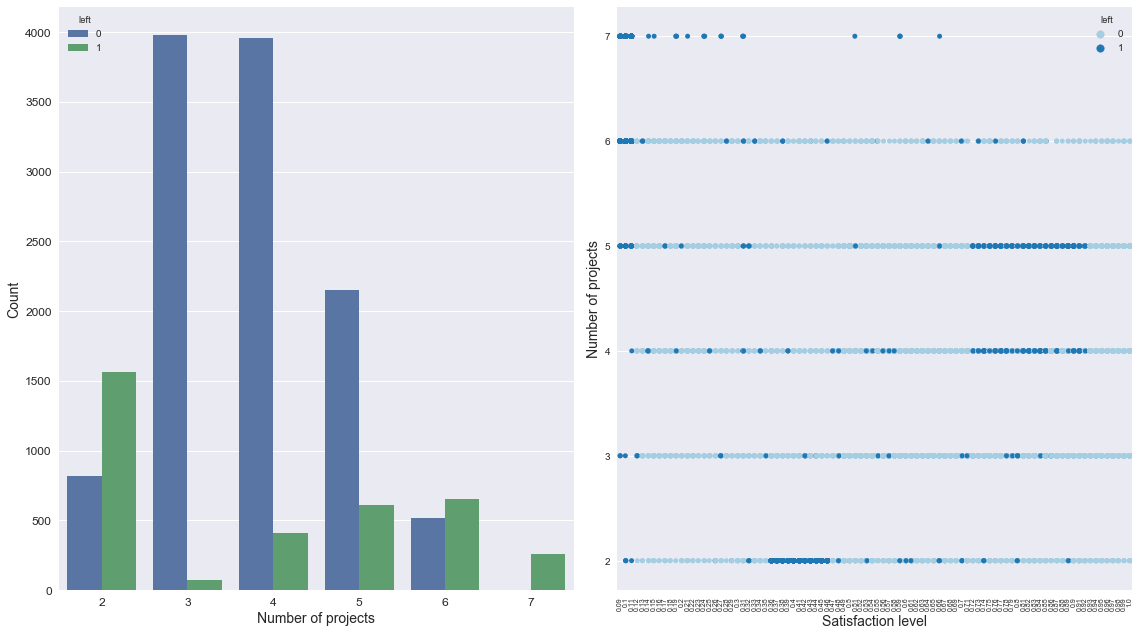

In [7]:
fig,ax = plt.subplots(figsize=(16, 9))
plt.subplot(1,2,1)
sns.countplot(x='number_project', hue='left', data = df)
plt.xlabel('Number of projects',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.subplot(1,2,2)
sns.stripplot(x='satisfaction_level', y='number_project', hue='left', data=df, palette='Paired',jitter=True)
plt.ylabel('Number of projects',fontsize=14)
plt.xlabel('Satisfaction level',fontsize=14)
plt.xticks(rotation=90,fontsize=7)
plt.tight_layout()
plt.show()

Whoever managed to deal with 7 projects finally left the company. All these employees have low satisfaction level. Employees with 6 projects who left their job are more than the others who stayed. Look at y-axis in the​ stripplot. We see a few "left" dots. This means that dots are cramped at the low satisfaction levels. We should take into account that more than 1500 (>10%) employees with two (2) projects left their job. Their satisfaction level is below the average.

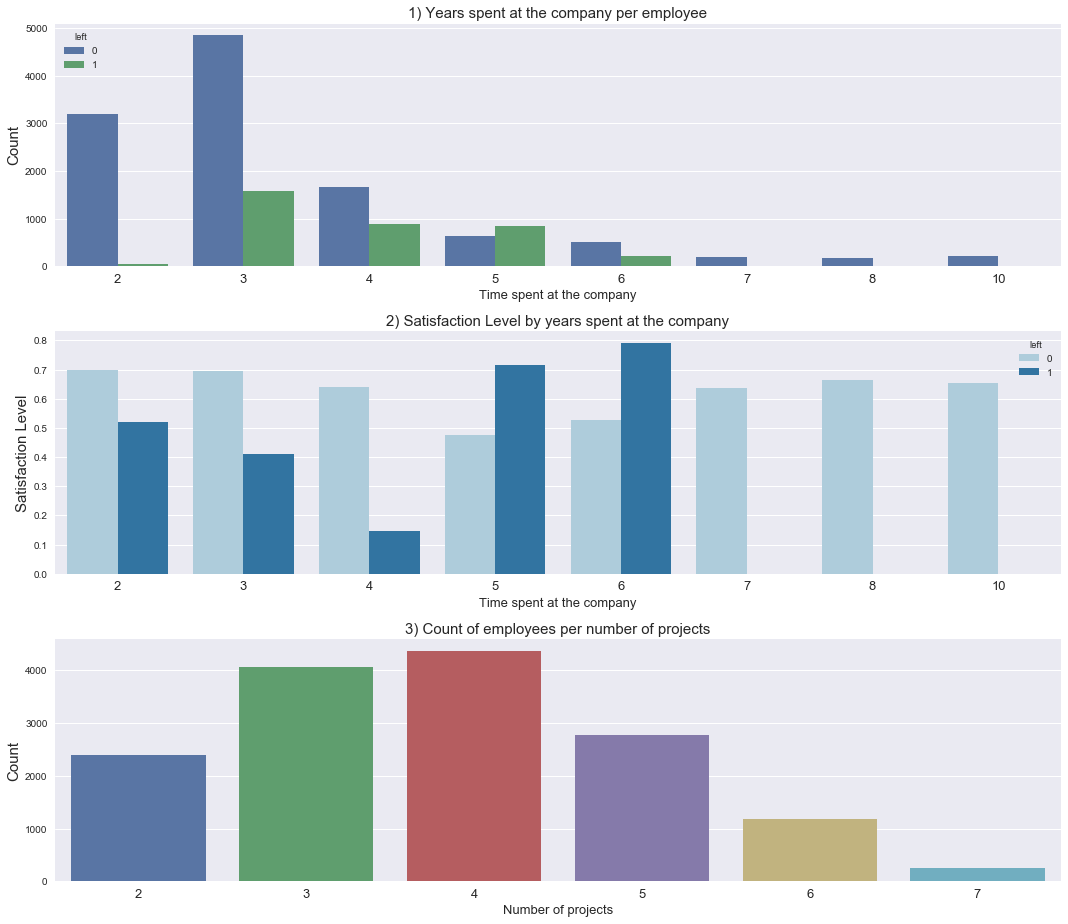

In [8]:
fig,ax = plt.subplots(figsize=(15, 13))
plt.subplot(3,1,1)
sns.countplot(x='time_spend_company', hue='left', data = df)
plt.xlabel('Time spent at the company',fontsize=13)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13)
plt.title('1) Years spent at the company per employee',fontsize=15)
plt.subplot(3,1,2)
sns.barplot(x='time_spend_company', y='satisfaction_level',hue='left', data=df, palette='Paired', ci=None)
plt.xlabel('Time spent at the company',fontsize=13)
plt.ylabel('Satisfaction Level',fontsize=15)
plt.xticks(fontsize=13)
plt.title('2) Satisfaction Level by years spent at the company',fontsize=15)
plt.subplot(3,1,3)
sns.countplot(x='number_project', data = df)
plt.xlabel('Number of projects',fontsize=13)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13)
plt.title('3) Count of employees per number of projects',fontsize=15)
plt.tight_layout()
plt.show()


That's a nice trinity of plots. With a first look, we see that  **a.** employees with over 7 years spent at the company stayed at their position. **b.** these people have a good satisfaction level. Well, how many are they? In how many projects are they involved in? What is their department? **c.** at the third plot we see that most of the employees have been occupied in 3 or 4 projects. **d.** comparatively to plot 1 most of the ​employees who left their jobs had 3, 4 or 5 projects.

Furthermore, whoever with 5 or 6 projects and satisfaction level above the average has left his/her company.

The next plot tells​ us about these guys who spent 7+ years at the company.

Projects :
3    214
4    186
5     94
2     38
6     32
Name: number_project, dtype: int64

Department :
sales          216
management     122
marketing       42
IT              38
support         38
product_mng     36
technical       32
accounting      24
RandD           10
hr               6
Name: sales, dtype: int64

Total : 564


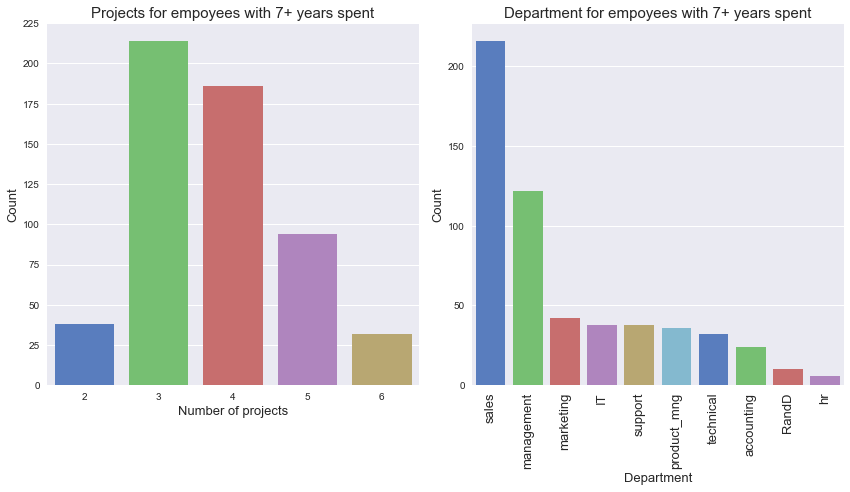

In [9]:
# Number of projects
z=df.loc[np.where(df['time_spend_company']>=7)]['number_project'].value_counts()
print('Projects :')
print(z)
print()
# Department
w=df.loc[np.where(df['time_spend_company']>=7)]['sales'].value_counts()
print('Department :')
print(w)
print()
print('Total :',w.sum())

fig,ax = plt.subplots(figsize=(12, 7))
plt.subplot(1,2,1)
sns.barplot(z.index,z,palette='muted')
plt.ylabel('Count',fontsize=13)
plt.xlabel('Number of projects',fontsize=13)
plt.title('Projects for empoyees with 7+ years spent',fontsize=15)
plt.subplot(1,2,2)
sns.barplot(w.index,w,palette='muted')
plt.ylabel('Count',fontsize=13)
plt.xlabel('Department',fontsize=13)
plt.xticks(rotation=90,fontsize=13)
plt.title('Department for empoyees with 7+ years spent',fontsize=15)
plt.tight_layout()
plt.show()

Most of 564 employees are distributed in "3" and "4" and they work mainly in sales & management dept. So far so good. Let's continue!

**Who out of these 564  " 7+ years " employees​ got a promotion ?**

Not promoted with 7-10 years of work : 502
Promoted with 7-10 years of work : 62


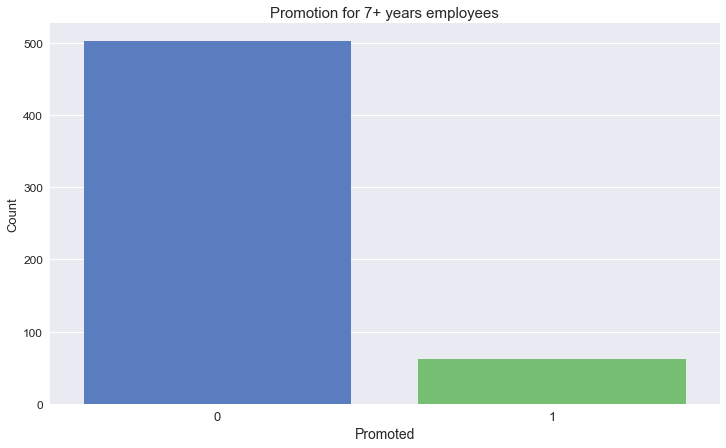

In [10]:
p=df.loc[np.where(df['time_spend_company']>=7)]['promotion_last_5years'].value_counts()
print('Not promoted with 7-10 years of work :',p[0])
print('Promoted with 7-10 years of work :',p[1])

fig,ax = plt.subplots(figsize=(12, 7))
sns.barplot(p.index,p,palette='muted')
plt.ylabel('Count',fontsize=13)
plt.xlabel('Promoted',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.title('Promotion for 7+ years employees',fontsize=15)
plt.show()

#### Work accident - affects a leave/stay decision ?

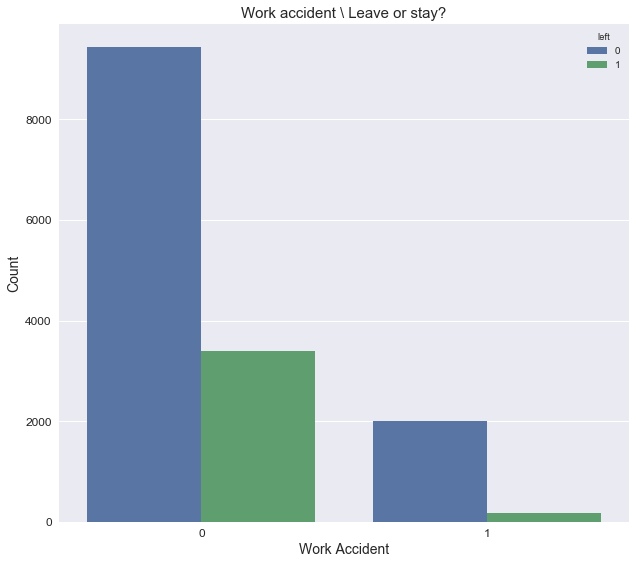

In [11]:
fig,ax=plt.subplots(figsize=(9,8))
sns.countplot(x='Work_accident', hue='left', data = df)
plt.title('Work accident \ Leave or stay?', fontsize=15)
plt.xlabel('Work Accident',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

Only a few with a work accident has left the building!

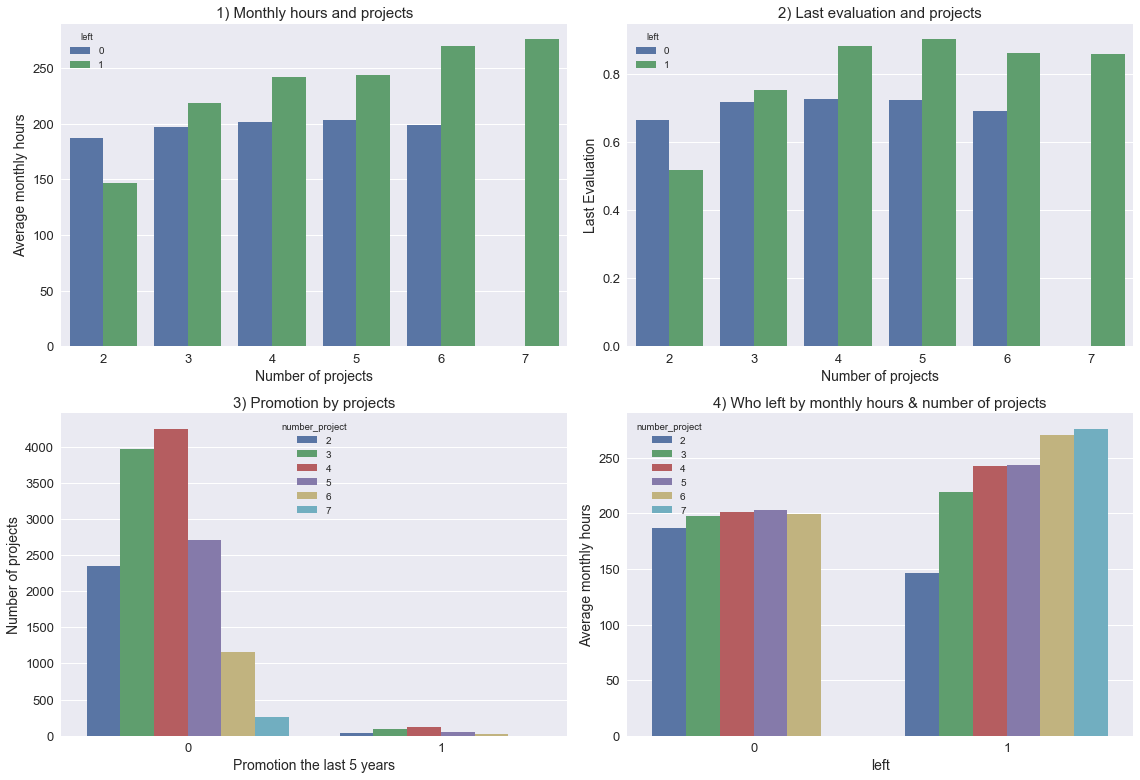

In [12]:
fig,ax=plt.subplots(figsize=(16,11))
plt.subplot(2,2,1)
sns.barplot(x='number_project', y='average_montly_hours',hue='left', data=df, ci=None)
plt.xlabel('Number of projects', fontsize=14)
plt.ylabel('Average monthly hours', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('1) Monthly hours and projects',fontsize=15)
plt.subplot(2,2,2)
sns.barplot(x='number_project', y='last_evaluation',hue='left', data=df, ci=None)
plt.xlabel('Number of projects', fontsize=14)
plt.ylabel('Last Evaluation', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('2) Last evaluation and projects',fontsize=15)
plt.subplot(2,2,3)
sns.countplot(x='promotion_last_5years', hue='number_project', data = df)
plt.ylabel('Number of projects',fontsize=14)
plt.xlabel('Promotion the last 5 years',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('3) Promotion by projects',fontsize=15)
plt.subplot(2,2,4)
sns.barplot(x='left', y='average_montly_hours',hue='number_project', data = df, ci=None)
plt.ylabel('Average monthly hours',fontsize=14)
plt.xlabel('left',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('4) Who left by monthly hours & number of projects',fontsize=15)
plt.tight_layout()
plt.show()

What comes out from those charts?​

First of all "7 projects" employees **left their job**. What about them? They have been **evaluated with a high score **(not the highest). They had the **biggest number of monthly hours of work**. That means a lot of work for several projects to be done.

Employees with 4 to 6 projects are (were) in the same situation. Very high evaluation scores, a lot of working hours every month and finally they made the choice to leave. These hard working men and women, did they been promoted? I guess the answer is "No" according to the ​plot (3).

#### Is this enough?  Could we say more?

I think that we don't get the whole picture by this moment. We need a little more exploration.

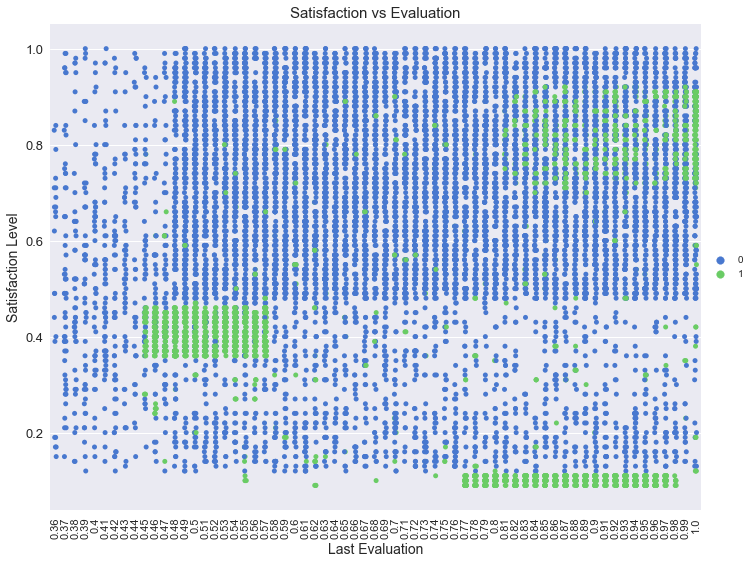

In [13]:
fig,ax=plt.subplots(figsize=(10,8))
sns.stripplot(x='last_evaluation' ,y='satisfaction_level',hue='left', data=df,
              jitter=True, palette="muted")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Last Evaluation',fontsize=14)
plt.ylabel('Satisfaction Level',fontsize=14)
plt.yticks(fontsize=13)
plt.xticks(rotation=90,fontsize=11)
plt.title('Satisfaction vs Evaluation',fontsize=15)
plt.tight_layout()
plt.show()

Wow, that's a very interesting chart. What we see here is three (3) categories of employees!

    - Category 1: Ambitious
    - Category 2: Ethical
    - Category 3: Disappointed
    
Before we do a further analysis to 3 categories let's see the average satisfaction​ level of "left" and "stayed" employees.

In [14]:
group_left=df[['satisfaction_level','left']].groupby(['left'],as_index=False).mean()
group_left['Counts'] =df.left.value_counts()
group_left

,left,satisfaction_level,Counts
0,0,0.666810,11428
1,1,0.440098,3571


In [15]:
# Ambitious

amb=pd.DataFrame()
amb=df.loc[np.where((df['satisfaction_level']>0.6)&(df['last_evaluation']>0.8)&(df['left']==1))]
# How many are they?
print('ambitious =',len(amb))
      
# Ethical
eth=pd.DataFrame()
eth=df.loc[np.where((df['satisfaction_level']>=0.36)&(df['satisfaction_level']<=0.46)&(df['last_evaluation']<0.58)&(df['left']==1))]
# How many are they?
print('ethical =',len(eth))   

# Disappointed
      
dis=pd.DataFrame()
dis=df.loc[np.where((df['satisfaction_level']<0.12)&(df['last_evaluation']>0.76)&(df['left']==1))]
# How many are they?
print('disappointed =',len(dis))

ambitious = 908
ethical = 1523
disappointed = 879


Let's compare these 3 categories by their mean values of all attributes.

In [16]:
means=pd.concat([df.mean(),amb.mean(), eth.mean(), dis.mean()], axis=1)
means.columns = ['all_employees','ambitious','ethical','disappointted']
means=means.drop(means.index[6])
means

,all_employees,ambitious,ethical,disappointted
satisfaction_level,0.612834,0.816244,0.408286,0.101604
last_evaluation,0.716102,0.923756,0.510722,0.872389
number_project,3.803054,4.566079,2.011819,6.216155
average_montly_hours,201.050337,244.116740,144.292843,276.863481
time_spend_company,3.498233,5.131057,3.001970,4.095563
Work_accident,0.144610,0.050661,0.047275,0.044369
promotion_last_5years,0.021268,0.001101,0.007879,0.003413


In [17]:
for j in ('ambitious','ethical','disappointted'):
    o=0
    u=0
    print(j)
    print()
    for i in range(len(means)):
        if means['all_employees'][i]>means[j][i]:
            print(means.index[i],'->','under average')
            u+=1
        else:
            print(means.index[i],'->','over average')
            o+=1
    print()
    print('over =',o,'under =',u)
    print()

ambitious

satisfaction_level -> over average
last_evaluation -> over average
number_project -> over average
average_montly_hours -> over average
time_spend_company -> over average
Work_accident -> under average
promotion_last_5years -> under average

over = 5 under = 2

ethical

satisfaction_level -> under average
last_evaluation -> under average
number_project -> under average
average_montly_hours -> under average
time_spend_company -> under average
Work_accident -> under average
promotion_last_5years -> under average

over = 0 under = 7

disappointted

satisfaction_level -> under average
last_evaluation -> over average
number_project -> over average
average_montly_hours -> over average
time_spend_company -> over average
Work_accident -> under average
promotion_last_5years -> under average

over = 4 under = 3



It's time to analyze the categories. 

First **"Ambitious"**. I named this category "ambitious" because employees in this category have all their stats over the average. They have high satisfaction level and evaluation score.They have accomplished, almost, 1 more project than the average, they work a lot every month. They did overtime work. They stayed at their position for 5 years! But what they didn't have? They didn't have any promotion over the last 5 years. Great stuff but they had to deploy their talent.

Second **"Ethical"**. This category is kinda mysterious. "Ethical" employees have no stats over the average. Are they underqualified? Maybe yes or maybe not. If they felt depressed or unsatisfied then perhaps they couldn't give their best of them. Low satisfaction level. A few "done" projects. Not so good for them to be every day at their work. Only 144 hours per month, when the average is 201. Of course, they didn't get any promotion the last five years because they quit their job at 3 years.

Last but not least...**Disappointed**. Let's start reversely. "*No promotion*". When you don't see your work be recognized, you feel a little disappointed. High evaluation score and a big number of projects. More than 11 hours every day at work. I think that the quite low satisfaction level is justifiable. They should try at another company, so they left their job position.

At the beginning​ of this analysis, ​we said that the "salary" factor is far from our conclusions. We should try again at this time with the categories we just created.

salary over categories


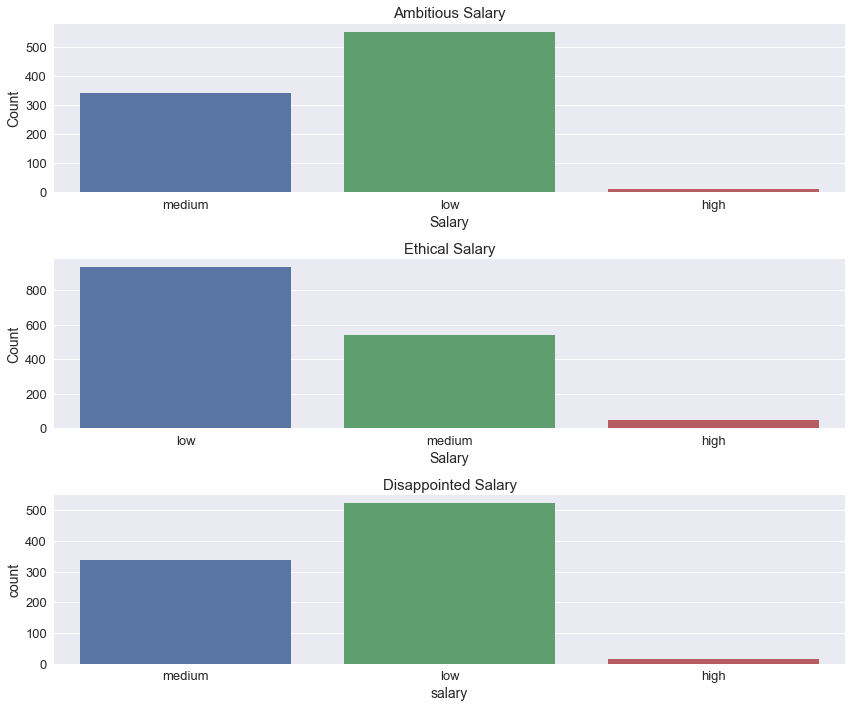

department over categories


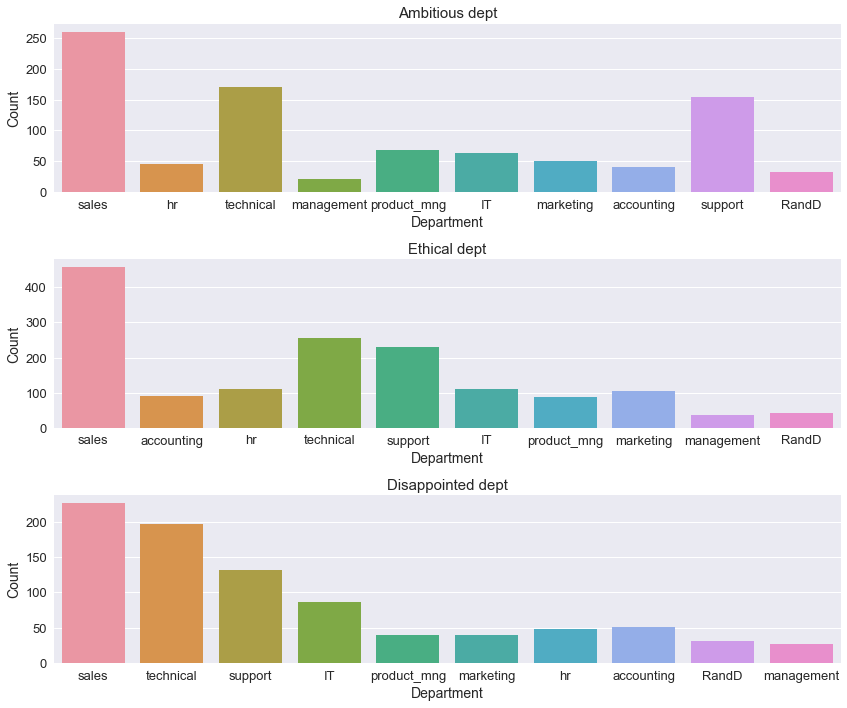

In [18]:
# salary over categories
print('salary over categories')

fig,ax=plt.subplots(figsize=(12,10))
plt.subplot(3,1,1)
sns.countplot(x='salary', data=amb)
plt.title('Ambitious Salary',fontsize=15)
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.subplot(3,1,2)
sns.countplot(x='salary', data=eth)
plt.title('Ethical Salary',fontsize=15)
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.subplot(3,1,3)
plt.title('Disappointed Salary',fontsize=15)
plt.xlabel('Salary',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
sns.countplot(x='salary', data=dis)
plt.tight_layout()
plt.show()

# department over categories
print('department over categories')

fig,ax=plt.subplots(figsize=(12,10))
plt.subplot(3,1,1)
sns.countplot(x='sales', data=amb)
plt.title('Ambitious dept',fontsize=15)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.subplot(3,1,2)
sns.countplot(x='sales', data=eth)
plt.title('Ethical dept',fontsize=15)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.subplot(3,1,3)
sns.countplot(x='sales', data=dis)
plt.title('Disappointed dept',fontsize=15)
plt.xlabel('Department',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.tight_layout()
plt.show()


Sales, Technical and Support have the bigger number of stuff leaks.

### Time to build a predictive model.

We will try out three(3) models to predict a "stay/leave" label.

- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier

Logistic Regression:

[**Logistic Regression**](https://en.wikipedia.org/wiki/Logistic_regression) is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. To represent binary / categorical outcome, we use dummy variables. You can also think of logistic regression as a special case of linear regression when the outcome variable is categorical, where we are using log of odds as dependent variable. In simple words, it predicts the probability of occurrence of an event by fitting data to a [**logit function**](https://en.wikipedia.org/wiki/Logistic_function).

Decision Tree Classifier:

[**Tree based**](https://en.wikipedia.org/wiki/Decision_tree_model) learning algorithms are considered to be one of the best and mostly used supervised learning methods. Tree-based methods empower predictive models with high accuracy, stability and ease of interpretation. Unlike linear models, they map non-linear relationships quite well. Decision tree is a type of supervised learning algorithm (having a pre-defined target variable) that is mostly used in classification problems. It works for both categorical and continuous input and output variables. In this technique, we split the population or sample into two or more homogeneous sets (or sub-populations) based on most significant splitter/differentiator in input variables.

Random Forest Classifier:

[**Random Forest**](https://en.wikipedia.org/wiki/Random_forest) is a versatile machine learning method capable of performing both regression and classification tasks. It also undertakes dimensional reduction methods, treats missing values, outlier values and other essential steps of data exploration, and does a fairly good job. It is a type of ensemble learning method, where a group of weak models combines​ to form a powerful model.

- ( links are from Wikipedia but there are a lot of scientific articles and books out there! )


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# move the target column to head of list using index, pop and insert
cols = list(df)
cols.insert(0, cols.pop(cols.index('left')))
df = df.ix[:, cols]

# scikit-learn needs everything to be numerical for decision trees to work

df = df.replace({'salary' : { 'low': 1, 'medium': 2, 'high' :3}})

df = df.replace({'sales' : {'sales' : 1, 'technical' : 2, 'support' :3, 'IT' :4, 
                            'product_mng' : 5, 'marketing' : 6, 'RandD' :7, 
                            'accounting' :8, 'hr' : 9, 'management' : 10}})


X=df.iloc[:,1:10]
y=df.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25 ,random_state=150)

def prediction_model(model):
    mdl=model(random_state = 150)
    mdl.fit(X_train,y_train)
    y_pred=mdl.predict(X_test)
    accuracy_mdl=accuracy_score(y_test,y_pred)
    conf_matrix=confusion_matrix(y_test,y_pred)
    print('accuracy score :',round(accuracy_mdl*100,2),'%')
    print(conf_matrix)
    print(classification_report(y_test,y_pred))
    return(model)

print('Logistic Regression')
prediction_model(LogisticRegression)
print('Decision Tree Classifier')
prediction_model(DecisionTreeClassifier)
print('Random Forest Classifier')
prediction_model(RandomForestClassifier)


Logistic Regression
accuracy score : 79.52 %
[[2682  181]
 [ 587  300]]
             precision    recall  f1-score   support

          0       0.82      0.94      0.87      2863
          1       0.62      0.34      0.44       887

avg / total       0.77      0.80      0.77      3750

Decision Tree Classifier
accuracy score : 97.73 %
[[2806   57]
 [  28  859]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      2863
          1       0.94      0.97      0.95       887

avg / total       0.98      0.98      0.98      3750

Random Forest Classifier
accuracy score : 99.07 %
[[2857    6]
 [  29  858]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99      2863
          1       0.99      0.97      0.98       887

avg / total       0.99      0.99      0.99      3750



sklearn.ensemble.forest.RandomForestClassifier

Logistic Regression scores 79.5%. This model has low performance (low precision, very low recall) on "left" label. Decision Tree Classifier scores 97.7%. It's a very high score and seems to perform better on "left" label. Finally, Random Forest Classifier has the biggest score. RF achieves a better score, 99% as a complex Decision tree model. More trees perform better than one tree. ( Check the last paragraph from this [notebook](https://github.com/stef-aramp/mpg_regression/blob/master/Notebook%20regression.ipynb) ). I think that Random Forest is the model we need, to predict the future of employees​ in companies.

We used 9 features as input, so let's see which of them are more important.

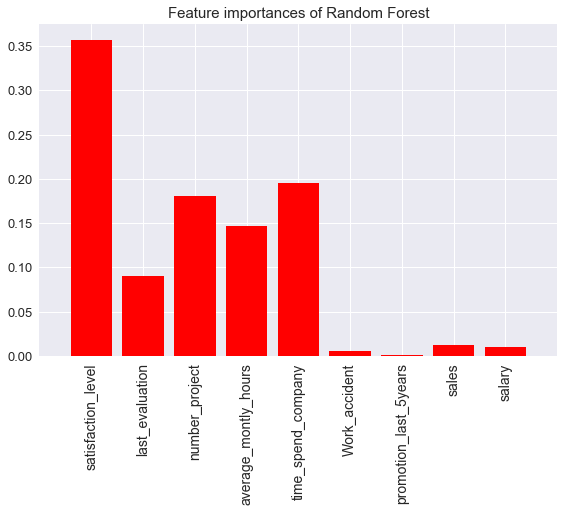

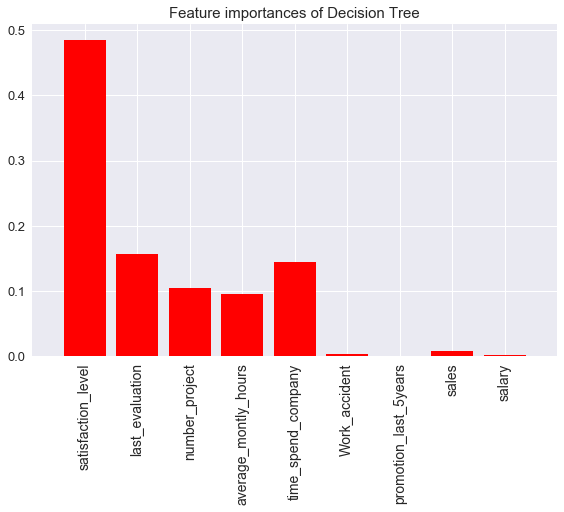

In [20]:

rf=RandomForestClassifier(random_state = 150).fit(X_train,y_train)
dt=DecisionTreeClassifier(random_state = 150).fit(X_train,y_train)
importances = rf.feature_importances_
importances2 = dt.feature_importances_

import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature importances of Random Forest",fontsize=15)
plt.bar(range(X_train.shape[1]), importances, color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns,fontsize=14)
plt.yticks(fontsize=13)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

plt.figure()
plt.title("Feature importances of Decision Tree",fontsize=15)
plt.bar(range(X_train.shape[1]), importances2, color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns,fontsize=14)
plt.yticks(fontsize=13)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Well, Satisfaction Level is the most important feature of all. More than 35% out of 99% in Random Forest and 48.5% (!) in Decision Tree Classifier! The following features are (in order of importance) Time spent at the company, Number of projects, Average monthly hours and Last evaluation. At this point, we can say that ​our work in Analysis part was pretty good and that's because we focused on these features.